In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time
import numba

In [24]:
@numba.jit
def mul(A: np.array, x: np.array):
    n = A.shape[0]
    res = np.zeros(n)
    for i in range(n):
        for j in range(n):
            res[i]+=A[i,j]*x[j]
    return res

@numba.jit
def seidel(A: np.array, b: np.array, tol: float):
    n = A.shape[0]
    x = np.zeros(n)
    err = []
    while True:
        for i in range(n):
            val = b[i]
            for j in range(n):
                if j!=i:
                    val -= A[i,j]*x[j]
            x[i] = val/A[i,i]
        err.append(np.linalg.norm(np.abs(mul(A, x)-b)))
        if err[len(err)-1]<=tol:
            break
    return x, err

In [25]:
n = 200
tol = 0.0001

A = np.random.rand(n, n)
A =  A @ A.T + np.eye(n) * 0.1
b = np.random.rand(n)

t_start = time.time()
x, err = seidel(A, b, tol)
t_end = time.time()

x_true = np.linalg.solve(A, b)
err_true = np.linalg.norm(np.abs(x-x_true))

iterations: 80969, error: 0.00021105209943835242, time: 3.9839377403259277s


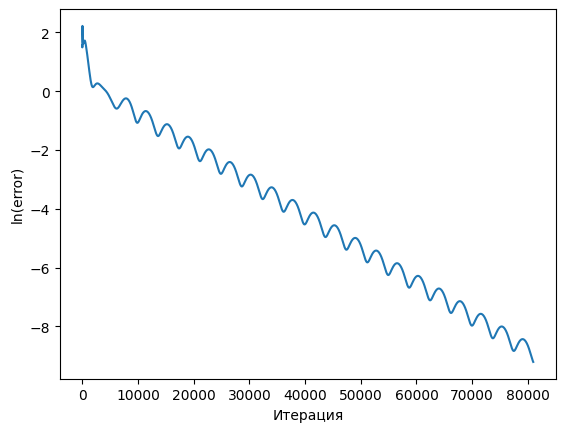

In [27]:
print(f"iterations: {len(err)}, error: {err_true}, time: {t_end-t_start}s")
plt.plot(np.log(err))
plt.xlabel("Итерация")
plt.ylabel("ln(error)")
plt.show()

График в логарифмической шкале близок к прямой линии, так как алгоритм сходится со скоростью q^k, где q=||(L+D)^-1 * U||